In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Label:
    parent = None
    customer= None
    cost = 0.0
    # ex 2.1 
    time = 0.0
    # ex 2.2
    load = 0
    # ex 3
    Ng_set = []
    def __init__(self, l = None, node = 0):
        self.customer = node
        if l:
            self.cost = l.cost + distance[(l.customer,node)] - reward[node]
            # ex 2.1 
            self.time = resource_extension_T(l, node)
            # ex 2.2
            self.load = resource_Q(l,node)
            # ex 3
            self.Ng_set = [elem for elem in l.Ng_set if elem in Ng[node]]
            self.Ng_set.append(node)
        self.parent = l

In [3]:
# Resource extension
def resource_extension_T(l, node):
    """Return resorces used so far""" 
    # ex 2.1
    return max(early[node], l.time + distance[(l.customer,node)])

In [4]:
def resource_Q(l,node):
    # ex 2.2
    return l.load + demand[node]

In [5]:
def feasible(l, i):
    """Returns if extending from label l to node i is feasible"""
    #Is it feasible to go to node i from label l?
    if l.customer == i:
        return False
    # ex 2.1 
    if distance[(l.customer,i)] +l.time > late[i]:
        return False
    # ex 2.2
    if l.load + demand[i] > Q:
        return False
    # ex 3
    if i in l.Ng_set:
        return False
    return True
    "We have to check feasible extensions!"

In [6]:
#dominance
def dominance(l1,l2):
    """Retuns true if l1 dominates l2"""
    if l1.cost <= l2.cost:
        # ex 2.1 
        if l1.time <= l2.time:
            # ex 2.2
            if l1.load <= l2.load:
                # ex 3
                a1 = set(l1.Ng_set)
                a2 = set(l2.Ng_set)
                if a1.issubset(a2): 
                    return True
    return False
    "Check dominace rules "

In [7]:
def labeling_algorithm():
    l0 = Label()
    M = {(k,i): [] for k in range(n) for i in range(n)}
    M[(0,0)].append(l0)
    
    for k in range(1, n): 

        ## k is the number of nodes visited
        for i in range(n):
            
            ## i is the current node
            for j in range(1,n):
                
                ## j is the new node to extend to
                if j == i: 
                    # the new node is different than the current node
                    continue
              
                for l in M[(k-1,i)]:
                    #print("mkij", k,i,j)
                    # l is all the labels stored in this bucket
                    if feasible(l,j):
                        l2 = Label(l,j) #extend label
                        dominated = False
                        for l1 in M[(k,j)]:
                            if dominance(l1, l2):
                                dominated = True
                            elif dominance(l2, l1):
                                ## if l1 is dominated then we need to delete l1
                                M[(k,j)].remove(l1)
                            if dominated:
                                break
                        if not dominated:
                            #if l2 is not dominated add to list of labels
                            M[(k,j)].append(l2)       
    return best_label(M)

In [8]:
def best_label(M={}):
    """Find the label with the shortest path back to the depot """
    best_l = Label()
    best_cost = 0
    for k in range(1,n):
        for i in range(1,n):
            for l in M[(k,i)]:
                a = distance[(l.customer,Start_id)]
                b = distance[(best_l.customer,Start_id)]
                if l.cost + a < best_l.cost +b:
                    best_l = l
                    best_cost = l.cost + a
    print("Solution value: ", best_cost)
    return best_l

In [9]:

def figure(t):
    ax = plt.gca()
    ax.cla() # clear things for fresh plot

    # change default range so that new circles will work
    ax.set_xlim((-5, 105))
    ax.set_ylim((-5, 105))
    b = []
    a = []
    
    for i in t:
        ax.plot(points[i][1],points[i][0], 'o',color = 'r')
        a = np.append(a, points[i][1])
        b = np.append(b, points[i][0])    
    a = np.append(a, points[t[0]][1])
    b = np.append(b, points[t[0]][0]) 
    ax.plot(a,b)
    for i in points:
        ax.plot(i[1],i[0], 'o',color = 'r')
    for i in t:
        ax.plot(points[i][1],points[i][0], 'o',color = 'r')
    ax.plot(points[0][1],points[0][0], 's', color = 'black')
    
    #plt.plot(a,b)
    
    
    plt.savefig('foo.png')

    plt.show() 
    

In [10]:
Start = (50,50) # Depot coordinates
points = [(Start)] #coordinates of all customers
Start_id = 0 # Depot idendifier
points += [(17, 72), (97, 8), (32, 15), (63, 97), (57, 60), (83, 48), (100, 26), (12, 62), (3, 49), (55, 77), 
          (97, 98), (0, 89), (57, 34), (92, 29), (75, 13), (40, 3), (2, 3), (83, 69), (1, 48), (87, 27), 
          (54, 92), (3, 67), (28, 97), (56, 63), (70, 29), (44, 29), (86, 28), (97, 58), (37, 2), (53, 71), 
          (82, 12), (23, 80), (92, 37), (15, 95), (42, 92), (91, 64), (54, 64), (85, 24), (38, 36), (75, 63), 
          (64, 50), (75, 4), (61, 31), (95, 51), (53, 85), (22, 46), (70, 89), (99, 86), (94, 47), (11, 56)]

n = len(points) # total number of nodes

In [11]:
# Distance between two cities (i,j)
distance = {(i, j):
        math.sqrt(sum((points[i][k]-points[j][k])**2 for k in range(2)))
        for i in range(n) for j in range(n)}

In [12]:
reward = {46: 43.15033999478041, 50: 20.948831277616726, 8: 17.263102417797167, 1: 21.18033988749895, 
          32: 27.72004514666935, 23: 30.872991584635255, 34: 29.308440859369416, 12: 38.35909773257803, 
          22: 40.20360331117452, 9: 20.23606797749979, 19: 47.24717771720739, 17: 80.0253925397308, 
          29: 38.176560460191574, 16: 17.584482762024336, 3: 32.86129401644173, 26: 27.65863337187866, 
          39: 27.65863337187866, 41: 33.1049731745428, 6: 36.99351699454112, 36: 26.373825194236886, 
          28: 15.765391263519088, 44: 11.403215514898179, 49: 14.32114465280323, 33: 21.014692853577536, 
          27: 14.939759452009628, 38: 7.728656901081649, 20: 8.990716082598492, 14: 13.929168552452033, 
          7: 26.792291336212188, 2: 33.77246228715468, 31: 26.154320508994672, 42: 19.63014581273465, 
          15: 25.76305461424021, 25: 25.982599071533098, 43: 14.219544457292887, 13: 22.46424919657298, 
          40: 38.17800560721074, 18: 33.3452350598575, 48: 35.510760120453945, 11: 40.626024002111855, 
          47: 39.090644754250064, 4: 20.92577595372165, 21: 22.295630140987, 35: 25.038404810405297, 
          45: 21.28461606164062, 10: 14.57076657157208, 30: 13.395623132202235, 37: 9.307135789365265, 
          24: 5.39834563766817, 5: 15.368833275902082}
reward[Start_id] = 0

In [13]:
######################################################################
########################### EXCERCISE 2 ##############################
######################################################################
#Solve the SPPRC

######################################################################
########################## EXCERCISE 2.1 #############################
######################################################################

###Time constraints

early = {46: 0, 50: 0, 8: 12, 1: 22, 32: 39, 23: 53, 34: 69, 12: 91, 22: 109, 9: 111, 19: 156, 17: 191, 29: 194, 16: 209, 3: 227, 26: 236, 39: 255, 41: 274, 6: 292, 36: 300, 28: 308, 44: 312, 49: 322, 33: 333, 27: 337, 38: 340, 20: 346, 14: 354, 7: 373, 2: 388, 31: 399, 42: 408, 15: 425, 25: 434, 43: 439, 13: 456, 40: 466, 18: 490, 48: 502, 11: 530, 47: 541, 4: 551, 21: 563, 35: 576, 45: 584, 10: 591, 30: 598, 37: 600, 24: 603, 5: 615}
late = {46: 35, 50: 41, 8: 53, 1: 63, 32: 80, 23: 94, 34: 110, 12: 132, 22: 150, 9: 152, 19: 197, 17: 232, 29: 235, 16: 250, 3: 268, 26: 277, 39: 296, 41: 315, 6: 333, 36: 341, 28: 349, 44: 353, 49: 363, 33: 374, 27: 378, 38: 381, 20: 387, 14: 395, 7: 414, 2: 429, 31: 440, 42: 449, 15: 466, 25: 475, 43: 480, 13: 497, 40: 507, 18: 531, 48: 543, 11: 571, 47: 582, 4: 592, 21: 604, 35: 617, 45: 625, 10: 632, 30: 639, 37: 641, 24: 644, 5: 656}


In [14]:

######################################################################
########################## EXCERCISE 2.2 #############################
######################################################################

### Capacity constraints
Q = 20 #the vehicle has a capacity of at most Q
demand = {e:1 for e in range(1,n)} # each node has a demand of q_i


In [15]:
######################################################################
########################### EXCERCISE 3 ##############################
######################################################################

#Solve the ESPPRC using Ng-route relaxation 

############################ NG_SETS #################################
Ng_v = 5
Ng = {}## dictionary with list of nearest neighbors
for i in range(1,n):
    nearest = []
    for j in range(1,n):
        nearest.append(j)
    res = sorted(nearest, key=lambda ele: distance[(i,ele)])
    Ng[i] = res[:Ng_v]
######################################################################    

In [16]:
l = labeling_algorithm() #find the label with the cheapest path

Solution value:  -286.25753576553


Optimal path:  [0, 46, 8, 22, 9, 19, 17, 3, 26, 39, 41, 6, 40, 18, 48, 11, 47, 4, 21, 45, 10, 0]


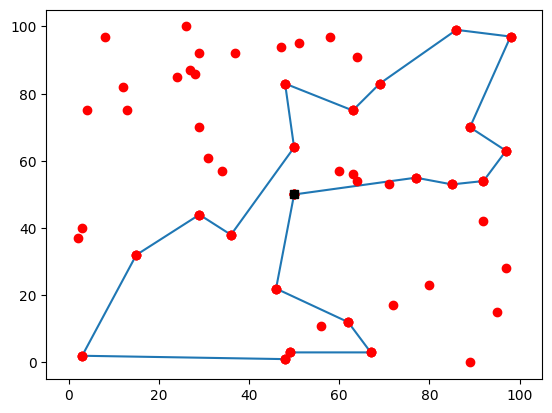

In [17]:
tour = []
while l.parent:
    tour.append(l.customer)
    l = l.parent
tour.append(Start_id)
tour.reverse()
tour.append(Start_id)
print("Optimal path: ",tour)
figure(tour)